<a href="https://colab.research.google.com/github/PoojithaKanagala/Data-Analytics/blob/main/TamiPro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R² Score: -0.11972316522420812
MSE: 36950850628.65609


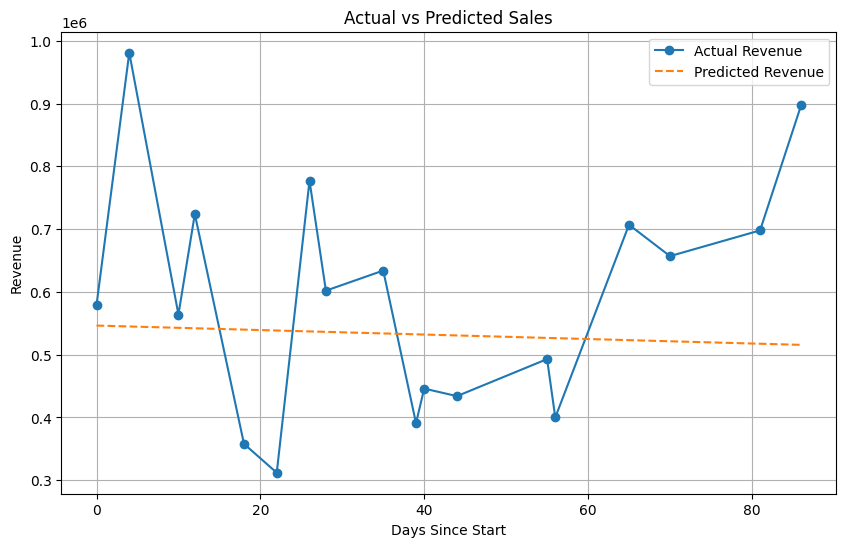

    Day  Predicted_Revenue
0    90      514239.383210
1    91      513882.224522
2    92      513525.065833
3    93      513167.907144
4    94      512810.748455
5    95      512453.589766
6    96      512096.431077
7    97      511739.272389
8    98      511382.113700
9    99      511024.955011
10  100      510667.796322
11  101      510310.637633
12  102      509953.478944
13  103      509596.320256
14  104      509239.161567
15  105      508882.002878
16  106      508524.844189
17  107      508167.685500
18  108      507810.526811
19  109      507453.368123
20  110      507096.209434
21  111      506739.050745
22  112      506381.892056
23  113      506024.733367
24  114      505667.574678
25  115      505310.415990
26  116      504953.257301
27  117      504596.098612
28  118      504238.939923
29  119      503881.781234


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
df = pd.read_excel("/content/sample_sales_forecasting_data.xlsx")
df['date'] = pd.to_datetime(df['date'])
daily_sales = df.groupby('date').agg({'quantity': 'sum', 'revenue': 'sum'}).reset_index()
daily_sales['days_since_start'] = (daily_sales['date'] - daily_sales['date'].min()).dt.days
X = daily_sales[['days_since_start']]
y = daily_sales['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
plot_df = X_test.copy()
plot_df['Actual'] = y_test
plot_df['Predicted'] = y_pred
plot_df = plot_df.sort_values('days_since_start')

plt.figure(figsize=(10, 6))
plt.plot(plot_df['days_since_start'], plot_df['Actual'], label='Actual Revenue', marker='o')
plt.plot(plot_df['days_since_start'], plot_df['Predicted'], label='Predicted Revenue', linestyle='--')
plt.xlabel("Days Since Start")
plt.ylabel("Revenue")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()
last_day = daily_sales['days_since_start'].max()
future_days = np.arange(last_day + 1, last_day + 31).reshape(-1, 1)
future_preds = model.predict(future_days)
forecast_df = pd.DataFrame({
    'Day': future_days.flatten(),
    'Predicted_Revenue': future_preds
})
print(forecast_df)